<a href="https://colab.research.google.com/github/jholliday55/jholliday-ADVDS/blob/main/Project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import os
from google.colab import drive 
import cv2
import glob
from google.colab import drive
import numpy as np
import tensorflow as tf

# mount google drive
drive.mount('/content/drive')

!ls /content/drive/
!ls -l /content/drive/MyDrive/facesDB
base_dir = '/content/drive/MyDrive/facesDB'

# Initialize list
data = []
labels = []

# Loop through facesDB
for dirname, _, filenames in os.walk('/content/drive/MyDrive/facesDB'):
    for filename in filenames:
      # check for None
      if cv2.imread(os.path.join(dirname, filename)) is None:
        continue
      else:
        # read image
        image = cv2.imread(os.path.join(dirname, filename))
        # check for none
        if image.all() != None:
          # push label and image into lists
          label = os.path.join(dirname, filename).split(os.path.sep)[-1].split(".")[0]
          data.append(image)
          labels.append(label)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MyDrive  Shareddrives
total 160
drwx------ 2 root root 4096 Mar  8 15:22 S1
drwx------ 2 root root 4096 Mar  8 15:22 S10
drwx------ 2 root root 4096 Mar  8 15:22 S11
drwx------ 2 root root 4096 Mar  8 15:22 S12
drwx------ 2 root root 4096 Mar  8 15:22 S13
drwx------ 2 root root 4096 Mar  8 15:22 S14
drwx------ 2 root root 4096 Mar  8 15:22 S15
drwx------ 2 root root 4096 Mar  8 15:22 S16
drwx------ 2 root root 4096 Mar  8 15:22 S17
drwx------ 2 root root 4096 Mar  8 15:22 S18
drwx------ 2 root root 4096 Mar  8 15:22 S19
drwx------ 2 root root 4096 Mar  8 15:22 S2
drwx------ 2 root root 4096 Mar  8 15:22 S20
drwx------ 2 root root 4096 Mar  8 15:22 S21
drwx------ 2 root root 4096 Mar  8 15:22 S22
drwx------ 2 root root 4096 Mar  8 15:22 S23
drwx------ 2 root root 4096 Mar  8 15:22 S24
drwx------ 2 root root 4096 Mar  8 15:22 S25
drwx------ 2 root root 4096 Mar

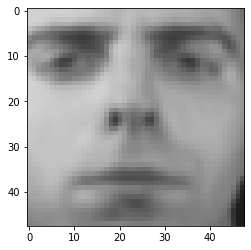

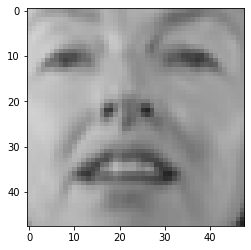

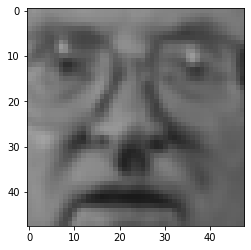

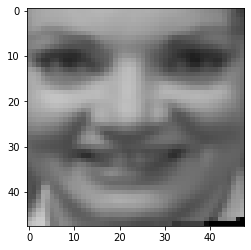

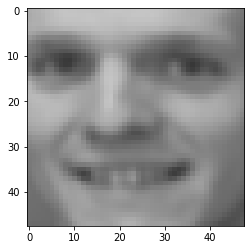

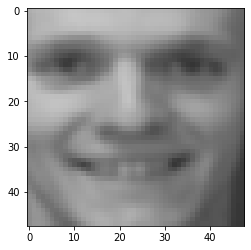

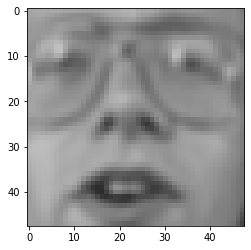

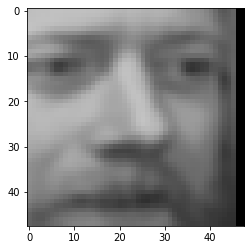

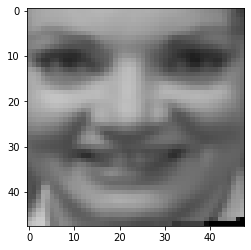

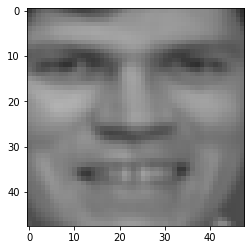

In [50]:
import matplotlib.pyplot as plt
from random import randrange
# print ten images randomnly to show images were read correctly
for x in range(0, 10):
  plt.imshow(data[randrange(100)])
  plt.show()

In [51]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd 

# loads dataset
def load_dataset():
  # reshape y or labels to fit for training
  target = np.array(labels)
  target = target.reshape(target.shape[0],1)
  target = tf.keras.utils.to_categorical(np.array(target))

  # divide by 225 to normalize values to be between 0-1
  x_scaled = np.array(data)
  x_scaled = x_scaled/225

  # split dataset using 20-80 rule
  trainX, testX, trainY, testY = train_test_split(x_scaled, target, train_size = 0.80, test_size = 0.20, random_state = 215)

  return trainX, trainY, testX, testY

In [52]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD

def create_compile_model_1():
  model = Sequential()
  # for our model we start with a convulational first layer using filter 3X3 with 64 layers and input size of 48X48
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(48, 48, 3)))
  model.add(MaxPooling2D((2, 2)))
  # next we have to flatten to provide the features
  model.add(Flatten())
  # we add another layer with 100 nodes
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  # we require an output layer of 11 nodes since it is a multi class classification
  model.add(Dense(11, activation='softmax'))
  # stochastic gradient descent optimizer using a learning rate of 0.01 and momentum at 0.9
  opt = SGD(lr=0.01, momentum=0.9)
  # compile model using categorical crossentropy 
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 
  return model

In [53]:
def create_compile_model_2():
  model = Sequential([
  # for this model we start with a similiar approach as model 1 but apply 32 layers                   
  Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(48, 48, 3)),
  MaxPooling2D(2),

  # convulational layers followed by max pooling
  Conv2D(128, 3, activation='relu', padding='same'),
  Conv2D(128, 3, activation='relu', padding='same'),
  MaxPooling2D(2),

  Conv2D(64, 3, activation='relu', padding='same'),
  Conv2D(64, 3, activation='relu', padding='same'),
  MaxPooling2D(2),

  # we must flatten because expects 1D array
  Flatten(),

  # Use dropout to avoid over fiting
  Dense(64, activation="relu"),
  Dropout(0.5),

  Dense(32, activation="relu"),
  Dropout(0.5),

  Dense(11, activation='softmax')
])
  # Use SGD as optimizer with learning rate of 0.01 and momentrum of 0.9 then compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 
  return model

In [54]:
def create_compile_model_3():
  model = Sequential([
  # for this model we start with a similiar approach as model 1 but apply 64 layers  
  Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(48, 48, 3)),
  MaxPooling2D(2),

  # convulational layers followed by max pooling
  Conv2D(128, 3, activation='relu', padding='same'),
  Conv2D(128, 3, activation='relu', padding='same'),
  MaxPooling2D(2),

  Conv2D(256, 3, activation='relu', padding='same'),
  Conv2D(256, 3, activation='relu', padding='same'),
  MaxPooling2D(2),

  # we must flatten because expects 1D array
  Flatten(),

  # Use dropout to avoid over fiting
  Dense(64, activation="relu"),
  Dropout(0.5),

  Dense(128, activation="relu"),
  Dropout(0.5),

  Dense(11, activation='softmax')
])
  # Use SGD as optimizer with learning rate of 0.01 and momentrum of 0.9 then compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 
  return model

In [55]:
def create_compile_model_4():
  model = Sequential([
  # for this model we start with a similiar approach as model 1 but apply 64 layers 
  Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)),
  MaxPooling2D(2),

  # convulational layers followed by max pooling
  Conv2D(128, 3, activation='relu', padding='same'),
  Conv2D(128, 3, activation='relu', padding='same'),
  MaxPooling2D(2),

  Conv2D(256, 3, activation='relu', padding='same'),
  Conv2D(256, 3, activation='relu', padding='same'),
  MaxPooling2D(2),

  # we must flatten because expects 1D array
  Flatten(),

   # Use dropout to avoid over fiting
  Dense(64, activation="relu"),
  Dropout(0.4),

  Dense(128, activation="relu"),
  Dropout(0.4),

  Dense(11, activation='softmax')
])

  # Use SGD as optimizer with learning rate of 0.01 and momentrum of 0.9 then compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 
  return model

In [56]:
def create_compile_model_5():
  model = Sequential([
  # for this model we start with a similiar approach as model 1 but apply 64 layers 
  Conv2D(64, 7, activation="relu", padding="same", input_shape=[48, 48, 3]),
  MaxPooling2D(2),

  # convulational layers followed by max pooling
  Conv2D(128, 3, activation='relu', padding='same'),
  Conv2D(128, 3, activation='relu', padding='same'),
  MaxPooling2D(2),

  Conv2D(256, 3, activation='relu', padding='same'),
  Conv2D(256, 3, activation='relu', padding='same'),
  MaxPooling2D(2),

  # we must flatten because expects 1D array
  Flatten(),

   # Use dropout to avoid over fiting
  Dense(64, activation="relu"),
  Dropout(0.6),

  Dense(128, activation="relu"),
  Dropout(0.6),

  Dense(11, activation='softmax')
])

  # Use SGD as optimizer with learning rate of 0.01 and momentrum of 0.9 then compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 
  return model

In [57]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()

def evaluate_model(model, dataX, dataY, n_folds):
  scores, histories = list(), list()
  # cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  for train_ix, test_ix in kfold.split(dataX):
    # split rows for train and test data
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # transofrm trainY and testY
    trainY = label_as_binary.fit_transform(trainY)
    testY = label_as_binary.fit_transform(testY)
    # fit model
    history = model.fit(trainX, trainY, epochs=11, batch_size=64, validation_data=(testX, testY), verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('Accuracy of CV Fold:  %.3f' % (acc * 100.0))
    scores.append(acc)
    histories.append(history)
  
  return scores, histories

In [58]:
def summarize_learning(histories):

  for i in range(len(histories)):
		# plots the loss
    pyplot.subplot(2, 1, 1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		
    # plots the accuracy
    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='red', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='green', label='test')
  
    pyplot.show()

In [59]:
def summarize_performance(scores):
  # display scores
	print('Model Accuracy: mean=%.3f std=%.3f, folds=%d' % (mean(scores)*100, std(scores)*100, len(scores)))

In [60]:
def process(model, num_folds):
  # starts by evaulating the model using CV
  scores, histories = evaluate_model(model, trainX, trainY, num_folds)
 
  # plots the learning curves
  summarize_learning(histories)
 
  # displays the summary
  summarize_performance(scores)

In [61]:
def getScores(scores):
  return mean(scores * 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Accuracy of CV Fold:  10.000
Accuracy of CV Fold:  11.875
Accuracy of CV Fold:  13.750
Accuracy of CV Fold:  28.750


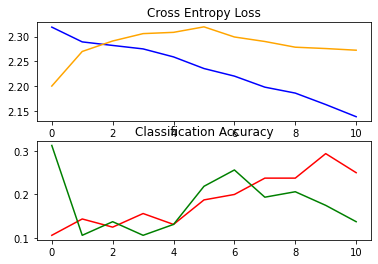

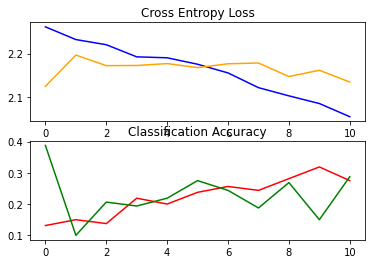

Model Accuracy: mean=21.250 std=7.500, folds=2


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Accuracy of CV Fold:  10.000
Accuracy of CV Fold:  11.250
Accuracy of CV Fold:  10.000
Accuracy of CV Fold:  11.250


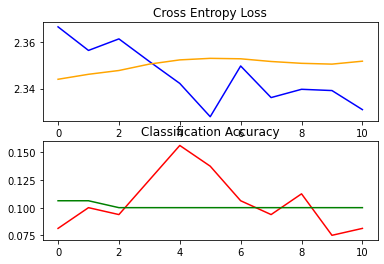

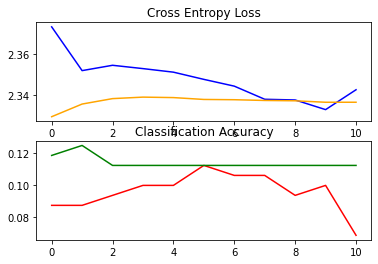

Model Accuracy: mean=10.625 std=0.625, folds=2


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Accuracy of CV Fold:  10.625
Accuracy of CV Fold:  11.875
Accuracy of CV Fold:  10.000
Accuracy of CV Fold:  12.500


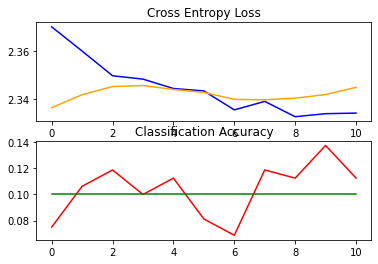

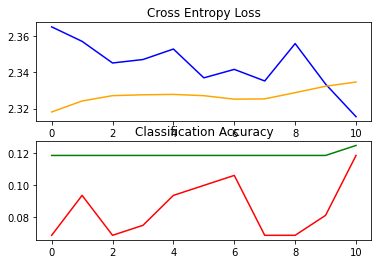

Model Accuracy: mean=11.250 std=1.250, folds=2


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Accuracy of CV Fold:  10.000
Accuracy of CV Fold:  12.500
Accuracy of CV Fold:  10.000
Accuracy of CV Fold:  8.750


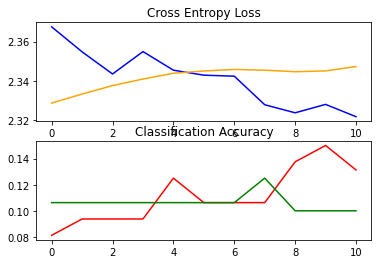

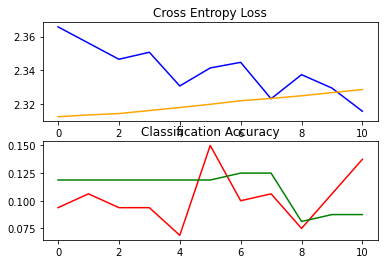

Model Accuracy: mean=9.375 std=0.625, folds=2


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Accuracy of CV Fold:  6.875
Accuracy of CV Fold:  11.875
Accuracy of CV Fold:  10.000
Accuracy of CV Fold:  8.750


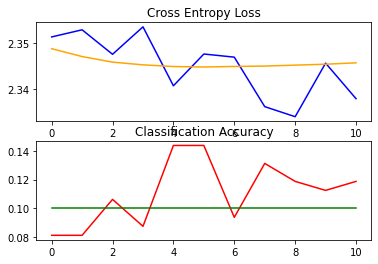

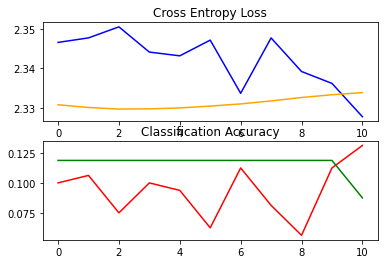

Model Accuracy: mean=9.375 std=0.625, folds=2


In [62]:
# Experiment with many different CVs
num_folds = 2
trainX, trainY, testX, testY = load_dataset()
model1 = create_compile_model_1()
model1score, model1history = evaluate_model(model1, trainX, trainY, num_folds)
model1score = getScores(model1score)

process(model1, num_folds)

trainX, trainY, testX, testY = load_dataset()
model2 = create_compile_model_2()
model2score, model2history = evaluate_model(model2, trainX, trainY, num_folds)
model2score = getScores(model2score)

process(model2, num_folds)

trainX, trainY, testX, testY = load_dataset()
model3 = create_compile_model_3()
model3score, model3history = evaluate_model(model3, trainX, trainY, num_folds)
model3score = getScores(model3score)

process(model3, num_folds)

trainX, trainY, testX, testY = load_dataset()
model4 = create_compile_model_4()
model4score, model4history = evaluate_model(model4, trainX, trainY, num_folds)
model4score = getScores(model4score)

process(model4, num_folds)

trainX, trainY, testX, testY = load_dataset()
model5 = create_compile_model_5()
model5score, model5history = evaluate_model(model5, trainX, trainY, num_folds)
model5score = getScores(model5score)

process(model5, num_folds)

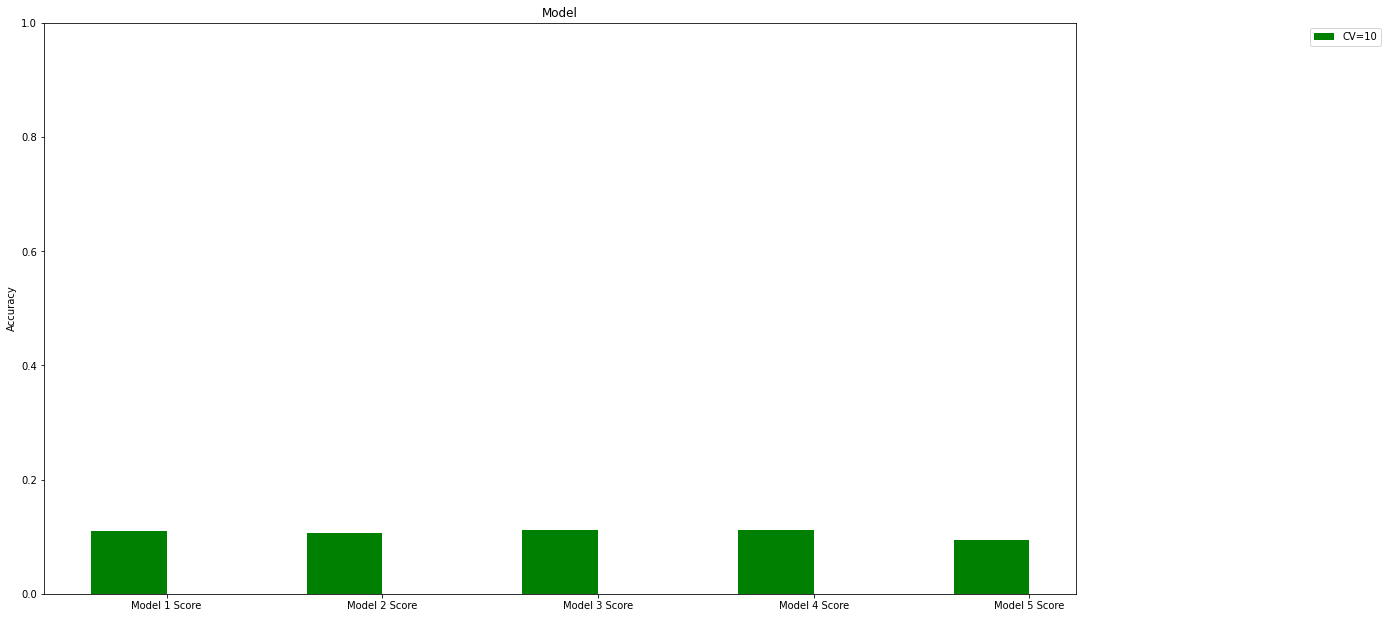

In [63]:
# labels for the plot
labels = [ 'Model 1 Score', 'Model 2 Score', 'Model 3 Score', 'Model 4 Score', 'Model 5 Score']
# scores calultaed from each model 
training_scores = [model1score, model2score, model3score, model4score, model5score]

X = np.arange(len(labels))  
width = .35  

fig, ax = plt.subplots()
rects1 = ax.bar(X - width/2, training_scores, width, label='CV=10', color='green')
fig.set_size_inches(18.5, 10.5, forward=True)

ax.set_ylabel('Accuracy')
ax.set_xticks(X)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

# plots each models accuracy
plt.title('Model')
plt.show()

[[ 0  0  0  0  0  0  0  0  6 24]
 [ 0  0  0  0  0  0  0  0  2 29]
 [ 0  0  0  0  0  0  0  0  3 28]
 [ 0  0  0  0  0  0  0  0  2 29]
 [ 0  0  0  0  0  0  0  0  7 24]
 [ 0  0  0  0  0  0  0  0  6 26]
 [ 0  0  0  0  0  0  0  0  7 28]
 [ 0  0  0  0  0  0  0  0  6 25]
 [ 0  0  0  0  0  0  0  0  9 24]
 [ 0  0  0  0  0  0  0  0 10 25]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        31
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        31
           5       0.00      0.00      0.00        31
           6       0.00      0.00      0.00        32
           7       0.00      0.00      0.00        35
           8       0.00      0.00      0.00        31
           9       0.16      0.27      0.20        33
          10       0.10      0.71      0.17        35

    accuracy                           0.11       320
   macro avg       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


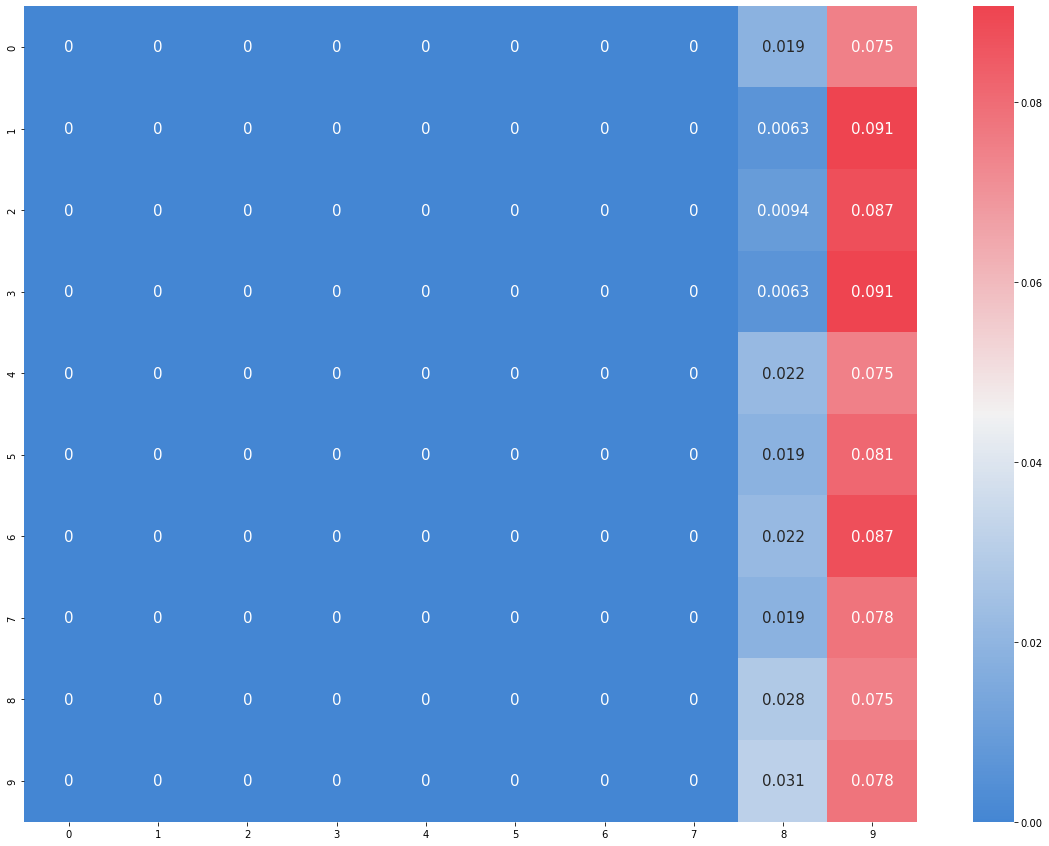

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# predicts using x_train
pred = model3.predict(trainX, batch_size = 32)
pred = np.argmax(pred, axis=1)

# creates confusion matrix then prints it out
rounded_labels=np.argmax(trainY, axis=1)
confusionMatrix = confusion_matrix(rounded_labels, pred)
print(confusionMatrix)

# prints out classification report
print(classification_report(rounded_labels, pred))

# prints out pretty confusion matrix
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
plt.subplots(figsize=(20,15))
sns.heatmap(confusionMatrix/np.sum(confusionMatrix), cmap=cmap,annot = True, annot_kws = {'size':15})